In [1]:
# must insert this statement to render the plots within the notebook
# this is specific to the ipython notebook
%matplotlib inline

## Import statements
# netcdf/numpy/xray/stats
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import xray
from scipy.stats.stats import pearsonr

# OS interaction
import sys, pickle, os

# import subplots function for plotting
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context('talk')
import matplotlib
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap

# Solargeometry
import solargeo

## Directory listing
dir_print = '/Users/karllapo/gdrive/SnowHydrology/proj/YosemiteIR/Graphics'
dir_data = '/Users/karllapo/gdrive/SnowHydrology/proj/TurbulenceFeedbacks/data/SNQ'

/Users/karllapo/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [18]:
def BrightnessTemp_norad(emis,wave_lambda,temp):
    ## Calculates the brightness temperature at a given wavelength
    
    ## Constants
    h = 6.62607004*10**(-34) # m2 kg / s
    c = 299792458 # m / s
    k = 1.38064852*10**(-23) # m2 kg s-2 K-1
    
    ## Expression
    Tbright = h*c / (k*wave_lambda * np.log( (emis + np.exp( (h*c) / (k*wave_lambda*temp) ) - 1)/ emis))
    return Tbright

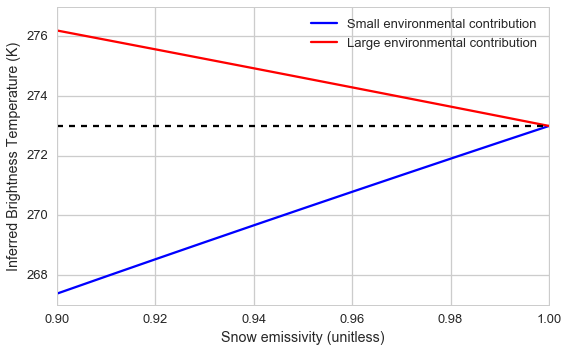

In [39]:
def Planck(emis,wave_lambda,temp):
    ## Calculates radiance at a given wavelength of an object w/ given emissivity and temperature
    
    ## Constants
    h = 6.62607004*10**(-34) # m2 kg / s
    c = 2.998*10**8 # m / s
    k = 1.38064852*10**(-23) # m2 kg s-2 K-1
        
    radiance = (2*h*c**2) *emis /(wave_lambda**5 * (np.exp( (h*c) / (k*wave_lambda*temp)) -1) )
    return radiance

def BrightnessTemp(rad,wave_lambda):
    ## Calculates the brightness temperature at a given wavelength
    
    ## Constants
    h = 6.62607004*10**(-34) # m2 kg / s
    c = 299792458 # m / s
    k = 1.38064852*10**(-23) # m2 kg s-2 K-1
    
    ## Expression
    Tbright = h*c / (k*wave_lambda) * 1 / np.log(2*h*c**2/(rad*wave_lambda**5) + 1)
    return Tbright

# Radiance
wave_lambda = 11*10**-6

# Snow's radiance
emis = np.arange(.9,1.01,.01)
refl = 1-emis
temp = 273
snowRad = Planck(emis,wave_lambda,temp)

# Environmental radiance
envrTemp = np.arange(253,303,1)
envrEmis = np.arange(.05,1,.01)
envrRad = np.empty((envrEmis.size,envrTemp.size))

for n,Tenvr in enumerate(envrTemp):
    envrRad[:,n] = Planck(envrEmis,wave_lambda,Tenvr)

# Inferred brightness temperature
# Tb = np.empty((snowRad.size,envrEmis.size,envrTemp.size))
# for m,Eenvr in enumerate(envrEmis):
#     for n,Tenvr in enumerate(envrTemp):
#         Tb[:,m,n] = BrightnessTemp(snowRad+(refl*envrRad[m,n]),wave_lambda)

## Plot
fig,ax = plt.subplots(1,1,figsize=(8,5))
Tb = BrightnessTemp(snowRad+(refl*envrRad.min()),wave_lambda)
plt.plot(emis,Tb,'b',label='Small environmental contribution')
Tb = BrightnessTemp(snowRad+(refl*envrRad.max()),wave_lambda)
plt.plot(emis,Tb,'r',label='Large environmental contribution')
plt.plot(np.array((.9,1)),np.array((273,273)),'k--')

ax.set_ylabel('Inferred Brightness Temperature (K)')
ax.set_xlabel('Snow emissivity (unitless)')
ax.legend(loc='best')

os.chdir(dir_print)
fig.tight_layout()
fig.savefig('SnowBrightnessTemperature.pdf')